# k-means

   k     avgdb
1  3  0.831681


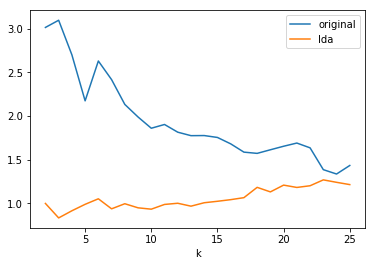

In [28]:
import pandas as pd

lda_avg_db = pd.read_csv('../results/kmeans_lda_avgdb.csv', header=None)
original_avg_db = pd.read_csv('../results/kmeans_original_avgdb.csv', header=None)

lda_avg_db.columns = ['k','avgdb']
original_avg_db.columns = ['k','avgdb']

ax = original_avg_db.plot.line(x=0,y=1, title=False)
ax = lda_avg_db.plot.line(x=0,y=1, ax=ax)

ax.legend(['original','lda'])
fig = ax.get_figure()
fig.savefig('../results/kmeans_lda_original_avgdb.pdf')

print(lda_avg_db[lda_avg_db['avgdb'] == lda_avg_db['avgdb'].min()])

# Agglomerative hierarchical